In [74]:
## Download Data

In [75]:
import requests
import pandas as pd
import sys
sys.path.append('../src')

from worldbank import download_worldbank




In [114]:

oecd_countries = [
    'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU',
    'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 'LUX', 'MEX',
    'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA'
]



In [112]:
world= download_worldbank(
    indicators = ['SH.XPD.CHEX.GD.ZS','SH.STA.DIAB.ZS','SP.URB.TOTL.IN.ZS','NY.GDP.PCAP.KD'],
    countries = oecd_countries,
    date_start = '2000',
    date_end = '2023'
)
world.head(5)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal,indicator_code
0,Current health expenditure (% of GDP),Australia,AUS,2023,NaN,NaN,NaN,2,SH.XPD.CHEX.GD.ZS
1,Current health expenditure (% of GDP),Australia,AUS,2022,9.926879,NaN,NaN,2,SH.XPD.CHEX.GD.ZS
2,Current health expenditure (% of GDP),Australia,AUS,2021,10.425253,NaN,NaN,2,SH.XPD.CHEX.GD.ZS
3,Current health expenditure (% of GDP),Australia,AUS,2020,10.660401,NaN,NaN,2,SH.XPD.CHEX.GD.ZS
4,Current health expenditure (% of GDP),Australia,AUS,2019,10.212851,NaN,NaN,2,SH.XPD.CHEX.GD.ZS


In [ ]:
# get OECD data on body weight (failed to fetch data from website, so i just use the csv
bw = pd.read_csv("../data/data_raw/body_weight.csv")
bw.head(5)


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,ISR,Israel,A,Annual,SP_OVRGHT_OBS,Share of population who are overweight or obese,...,2015,NaN,50.9,NaN,A,Normal value,0,Units,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,ESP,Spain,A,Annual,SP_OVRGHT_OBS,Share of population who are overweight or obese,...,2001,NaN,48.3,NaN,A,Normal value,0,Units,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,ESP,Spain,A,Annual,SP_OVRGHT_OBS,Share of population who are overweight or obese,...,2003,NaN,48.4,NaN,A,Normal value,0,Units,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,ESP,Spain,A,Annual,SP_OVRGHT_OBS,Share of population who are overweight or obese,...,2006,NaN,51.1,NaN,A,Normal value,0,Units,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG_BW(...,Body weight,I,ESP,Spain,A,Annual,SP_OVRGHT_OBS,Share of population who are overweight or obese,...,2009,NaN,52.8,NaN,A,Normal value,0,Units,NaN,NaN


In [105]:
bw_selected = bw[['REF_AREA','Reference area','OBS_VALUE','TIME_PERIOD']]
bw_selected.head

<bound method NDFrame.head of      REF_AREA Reference area  OBS_VALUE  TIME_PERIOD
0         ISR         Israel       50.9         2015
1         ESP          Spain       48.3         2001
2         ESP          Spain       48.4         2003
3         ESP          Spain       51.1         2006
4         ESP          Spain       52.8         2009
...       ...            ...        ...          ...
1589      BGR       Bulgaria       54.0         2014
1590      BGR       Bulgaria       54.8         2019
1591      BGR       Bulgaria       11.5         2008
1592      BGR       Bulgaria       14.8         2014
1593      BGR       Bulgaria       13.6         2019

[1594 rows x 4 columns]>

In [106]:
world_selected = world[['countryiso3code','country', 'value','date']]
world_selected.head

<bound method NDFrame.head of      countryiso3code        country         value  date
0                AUS      Australia           NaN  2023
1                AUS      Australia      9.926879  2022
2                AUS      Australia     10.425253  2021
3                AUS      Australia     10.660401  2020
4                AUS      Australia     10.212851  2019
...              ...            ...           ...   ...
3547             USA  United States  51348.347338  2004
3548             USA  United States  49905.523307  2003
3549             USA  United States  48967.366120  2002
3550             USA  United States  48597.424614  2001
3551             USA  United States  48616.254626  2000

[3552 rows x 4 columns]>

In [115]:
# rename oecd columns
bw_selected_rename = bw_selected.rename({"REF_AREA":'code', "Reference area":'country',"OBS_VALUE":'value',"TIME_PERIOD":'year'}, axis=1)
bw_selected_rename.head(2)

,code,country,value,year
0,ISR,Israel,50.9,2015
1,ESP,Spain,48.3,2001


In [103]:
# rename world bank columns
world_selected_rename = world_selected.rename({"countryiso3code":'code',"date":'year'}, axis=1)
world_selected_rename.head(2)

,code,country,value,year
0,AUS,Australia,NaN,2023
1,AUS,Australia,9.926879,2022


In [117]:
# set index 
# Set index for World Bank
world = world_selected_rename.set_index(['country', 'year', 'code'])

# Set index for Body Weight
bw = bw_selected_rename.set_index(['country', 'year', 'code'])

world.head(2)
bw.head(2)


,,,value
country,year,code,
Israel,2015,ISR,50.9
Spain,2001,ESP,48.3


In [122]:
# Merge the two datasets
merged = world.join(bw, lsuffix='_world', rsuffix='_bw', how='inner')

merged.head(20)

# Save the merged dataset to a CSV file
merged.to_csv('../data/processed/merged_wb_oecd.csv')

In [124]:
# descriptive statistics
merged.describe()


,value_world,value_bw
count,3684.000000,4824.000000
mean,12553.986361,34.558624
std,20506.796162,15.918262
min,4.200000,2.500000
25%,10.272341,21.500000
50%,80.606000,34.400000
75%,25073.720975,46.100000
max,107350.626687,75.200000


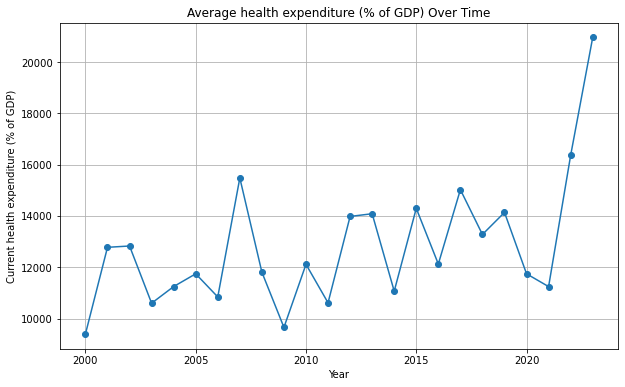

In [ ]:
import matplotlib.pyplot as plt

# Group by year
yearly_mean = merged_reset.groupby('year')[['value_world', 'value_bw']].mean()

# First plot: World Bank Indicator
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean.index, yearly_mean['value_world'], marker='o')
plt.title('Average health expenditure (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('Current health expenditure (% of GDP)')
plt.grid(True)
plt.show()


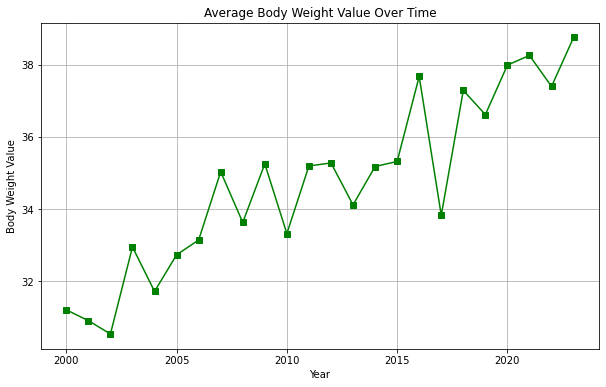

In [132]:
# Second plot: Body Weight
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean.index, yearly_mean['value_bw'], marker='s', color='green')
plt.title('Average Body Weight Value Over Time')
plt.xlabel('Year')
plt.ylabel('Body Weight Value')
plt.grid(True)
plt.show()
